<a href="https://colab.research.google.com/github/ajaysaikiran2208/MLCONCEPTS/blob/main/Wisconsin_Diagnostic_Breast_Cancer_(WDBC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Wisconsin Diagnostic Breast Cancer (WDBC)

Number of instances: #569 

Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)

Attribute information

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

Several of the papers listed above contain detailed descriptions of
how these features are computed. 

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.
Missing attribute values: none

Class distribution: 357 benign, 212 malignant

Results:

	- predicting field 2, diagnosis: B = benign, M = malignant
	- sets are linearly separable using all 30 input features
	- best predictive accuracy obtained using one separating plane
		in the 3-D space of Worst Area, Worst Smoothness and
		Mean Texture.  Estimated accuracy 97.5% using repeated
		10-fold crossvalidations.  Classifier has correctly
		diagnosed 176 consecutive new patients as of November
		1995. 

In [58]:
!pip install catboost

     |████████████████████████████████| 69.2MB 60kB/s 


In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime 
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier


In [60]:
df = pd.read_csv("/content/cancer.csv")

In [26]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [27]:
df.info

<bound method DataFrame.info of            id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0      842302         M  ...                  0.11890          NaN
1      842517         M  ...                  0.08902          NaN
2    84300903         M  ...                  0.08758          NaN
3    84348301         M  ...                  0.17300          NaN
4    84358402         M  ...                  0.07678          NaN
..        ...       ...  ...                      ...          ...
564    926424         M  ...                  0.07115          NaN
565    926682         M  ...                  0.06637          NaN
566    926954         M  ...                  0.07820          NaN
567    927241         M  ...                  0.12400          NaN
568     92751         B  ...                  0.07039          NaN

[569 rows x 33 columns]>

In [28]:
df = df.rename(columns={'diagnosis':'Label'})

In [35]:
df

,id,Label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [30]:
####### Replace categorical values with numbers########
df['Label'].value_counts()

B    357
M    212
Name: Label, dtype: int64

In [31]:
#Define the dependent variable that needs to be predicted (labels)
y = df["Label"].values

In [32]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M=1 and B=0

In [37]:
#Define the independent variables, so we can normalize other data
X= df.drop(labels = ["Label", "id"], axis=1) 

In [38]:
feature_names = np.array(X.columns)  #Convert dtype string?

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:765: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:706: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


Model building

In [66]:
##Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [68]:
y_train = np.nan_to_num(y_train)

In [69]:
X_train = np.nan_to_num(X_train)

In [71]:
X_test = np.nan_to_num(X_test)

#Logistic Regression

In [80]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

#convert into binary values 0/1 for classification
for i in range(0, X_test.shape[0]):
    if y_pred_lr[i]>=.5:       # setting threshold to .5
       y_pred_lr[i]=1
    else:  
       y_pred_lr[i]=0

Accuracy Score of Logistic Regression is : 0.9736842105263158
Confusion Matrix : 
[[70  1]
 [ 2 41]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



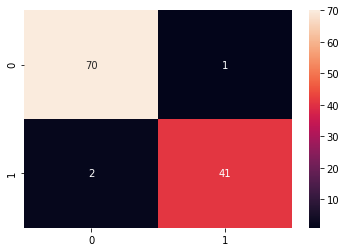

In [83]:
#Confusion matrix

cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True)

#KNN

In [82]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")
#convert into binary values 0/1 for classification
for i in range(0, X_test.shape[0]):
    if y_pred_knn[i]>=.5:       # setting threshold to .5
       y_pred_knn[i]=1
    else:  
       y_pred_knn[i]=0

Accuracy Score of KNN is : 0.9473684210526315
Confusion Matrix : 
[[68  3]
 [ 3 40]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



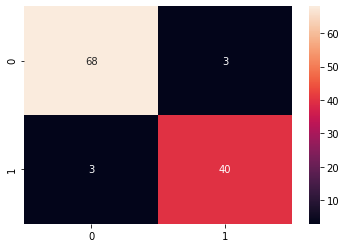

In [84]:
#Confusion matrix

cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True)

#Decision Tree Classifier

In [86]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")
#convert into binary values 0/1 for classification
for i in range(0, X_test.shape[0]):
    if y_pred_dtc[i]>=.5:       # setting threshold to .5
       y_pred_dtc[i]=1
    else:  
       y_pred_dtc[i]=0

Accuracy Score of Decision Tree is : 0.9385964912280702
Confusion Matrix : 
[[67  4]
 [ 3 40]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



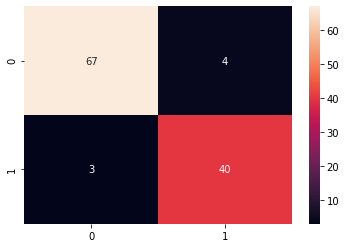

In [87]:
#Confusion matrix

cm_dtc = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cm_dtc, annot=True)

##Random Forest Classifier

In [88]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.9649122807017544
Confusion Matrix : 
[[70  1]
 [ 3 40]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [89]:
for i in range(0, X_test.shape[0]):
    if y_pred_rd_clf[i]>=.5:       # setting threshold to .5
       y_pred_rd_clf[i]=1
    else:  
       y_pred_rd_clf[i]=0

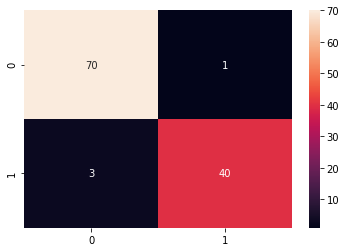

In [90]:
#Confusion matrix

cm_rd_clf = confusion_matrix(y_test, y_pred_rd_clf)
sns.heatmap(cm_rd_clf, annot=True)

#Ada Boost Classifier

In [112]:
ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

acc_ada = accuracy_score(y_test, y_pred_ada)
conf = confusion_matrix(y_test, y_pred_ada)
clf_report = classification_report(y_test, y_pred_ada)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_ada}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9385964912280702
Confusion Matrix : 
[[67  4]
 [ 3 40]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



In [92]:
for i in range(0, X_test.shape[0]):
    if y_pred_ada[i]>=.5:       # setting threshold to .5
       y_pred_ada[i]=1
    else:  
       y_pred_ada[i]=0

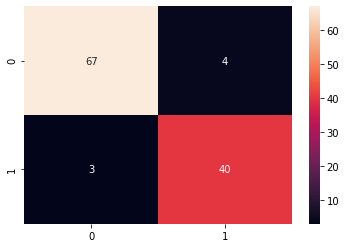

In [93]:
#Confusion matrix

cm_rd_ada = confusion_matrix(y_test, y_pred_ada)
sns.heatmap(cm_rd_ada, annot=True)

#Gradient Boosting Classifier

In [113]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
conf = confusion_matrix(y_test, y_pred_gb)
clf_report = classification_report(y_test, y_pred_gb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.956140350877193
Confusion Matrix : 
[[69  2]
 [ 3 40]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [95]:
for i in range(0, X_test.shape[0]):
    if y_pred_gb[i]>=.5:       # setting threshold to .5
       y_pred_gb[i]=1
    else:  
       y_pred_gb[i]=0

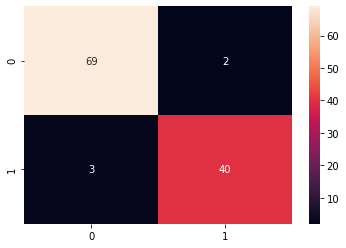

In [96]:
#Confusion matrix

cm_rd_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_rd_gb, annot=True)

##XGBOOST

In [50]:
import xgboost as xgb 
dtrain=xgb.DMatrix(X_train,label=y_train)

In [51]:
#setting parameters for xgboost
parameters={'max_depth':10, 
            'objective':'binary:logistic',
            'eval_metric':'auc',
            'learning_rate':.05}

In [52]:
start = datetime.now() 
xg=xgb.train(parameters, dtrain, 50) 
stop = datetime.now()

In [53]:
#Execution time of the model 
execution_time_xgb = stop-start 
print("XGBoost execution time is: ", execution_time_xgb)

XGBoost execution time is:  0:00:00.199127


In [54]:
#now predicting the model on the test set 
dtest=xgb.DMatrix(X_test)
y_pred_xgb = xg.predict(dtest) 

In [55]:
#Converting probabilities into 1 or 0  
for i in range(0, X_test.shape[0]): 
    if y_pred_xgb[i]>=.5:       # setting threshold to .5 
       y_pred_xgb[i]=1 
    else: 
       y_pred_xgb[i]=0 

Accuracy with XGBoost=  0.956140350877193
AUC score with XGBoost is:  0.9553571428571429


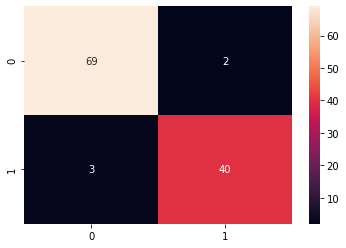

In [56]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True)

print ("Accuracy with XGBoost= ", metrics.accuracy_score(y_pred_xgb, y_test))
print("AUC score with XGBoost is: ", roc_auc_score(y_pred_xgb, y_test))

In [115]:
acc_xgb = accuracy_score(y_test, y_pred_xgb)
acc_xgb

0.956140350877193

#Cat Boost Classifier

In [100]:
cat = CatBoostClassifier(iterations=100)
cat.fit(X_train, y_train)

y_pred_cat = cat.predict(X_test)

acc_cat = accuracy_score(y_test, y_pred_cat)
conf = confusion_matrix(y_test, y_pred_cat)
clf_report = classification_report(y_test, y_pred_cat)
print(f"Accuracy Score of Ada Boost Classifier is : {acc_cat}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Learning rate set to 0.0608
0:	learn: 0.6003244	total: 10.7ms	remaining: 1.06s
1:	learn: 0.5205559	total: 21.2ms	remaining: 1.04s
2:	learn: 0.4595028	total: 31.4ms	remaining: 1.02s
3:	learn: 0.4086845	total: 41.9ms	remaining: 1.01s
4:	learn: 0.3576442	total: 51.8ms	remaining: 985ms
5:	learn: 0.3232510	total: 61.6ms	remaining: 966ms
6:	learn: 0.2886882	total: 71.7ms	remaining: 953ms
7:	learn: 0.2605498	total: 82.1ms	remaining: 944ms
8:	learn: 0.2322379	total: 92.3ms	remaining: 933ms
9:	learn: 0.2114509	total: 102ms	remaining: 919ms
10:	learn: 0.1941657	total: 112ms	remaining: 906ms
11:	learn: 0.1779906	total: 122ms	remaining: 898ms
12:	learn: 0.1642491	total: 133ms	remaining: 890ms
13:	learn: 0.1524483	total: 143ms	remaining: 877ms
14:	learn: 0.1403876	total: 153ms	remaining: 866ms
15:	learn: 0.1321275	total: 163ms	remaining: 858ms
16:	learn: 0.1268576	total: 174ms	remaining: 849ms
17:	learn: 0.1210375	total: 184ms	remaining: 840ms
18:	learn: 0.1155097	total: 201ms	remaining: 857ms
19:	

In [ ]:
#Converting probabilities into 1 or 0  
for i in range(0, X_test.shape[0]): 
    if y_pred_cat[i]>=.5:       # setting threshold to .5 
       y_pred_cat[i]=1 
    else: 
       y_pred_cat[i]=0 

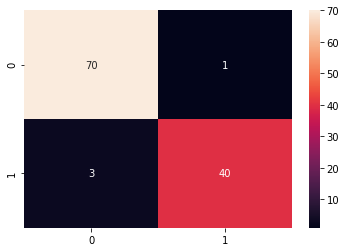

In [101]:
#Confusion Matrix
cm_cat = confusion_matrix(y_test, y_pred_cat)
sns.heatmap(cm_cat, annot=True)



#Extra Trees Classifier

In [102]:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

y_pred_etc = etc.predict(X_test)

acc_etc = accuracy_score(y_test, y_pred_etc)
conf = confusion_matrix(y_test, y_pred_etc)
clf_report = classification_report(y_test, y_pred_etc)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_etc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9736842105263158
Confusion Matrix : 
[[70  1]
 [ 2 41]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [105]:
#Converting probabilities into 1 or 0  
for i in range(0, X_test.shape[0]): 
    if y_pred_etc[i]>=.5:       # setting threshold to .5 
       y_pred_etc[i]=1 
    else: 
       y_pred_etc[i]=0 

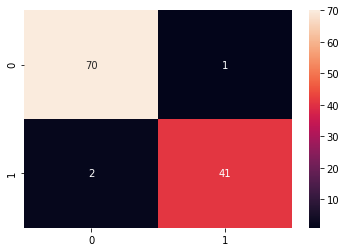

In [106]:
#Confusion Matrix
cm_etc = confusion_matrix(y_test, y_pred_etc)
sns.heatmap(cm_etc, annot=True)


#LGBM Classifier

In [107]:
lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

y_pred_lgbm = lgbm.predict(X_test)

acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
conf = confusion_matrix(y_test, y_pred_lgbm)
clf_report = classification_report(y_test, y_pred_lgbm)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_lgbm}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9736842105263158
Confusion Matrix : 
[[70  1]
 [ 2 41]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [108]:
#Converting probabilities into 1 or 0  
for i in range(0, X_test.shape[0]): 
    if y_pred_lgbm[i]>=.5:       # setting threshold to .5 
       y_pred_lgbm[i]=1 
    else: 
       y_pred_lgbm[i]=0 

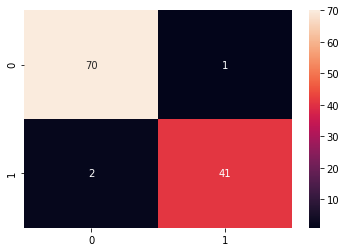

In [109]:
#Confusion Matrix
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm_lgbm, annot=True)

In [117]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier', 'LGBM'],
    'Score' : [acc_lr, acc_knn, acc_dtc, acc_rd_clf, acc_ada, acc_gb, acc_xgb, acc_cat, acc_etc, acc_lgbm]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regression,0.973684
8,Extra Trees Classifier,0.973684
9,LGBM,0.973684
3,Random Forest Classifier,0.964912
7,Cat Boost,0.964912
5,Gradient Boosting Classifier,0.956140
6,XgBoost,0.956140
1,KNN,0.947368
2,Decision Tree Classifier,0.938596
4,Ada Boost Classifier,0.938596
